In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set()

In [2]:
data = pd.read_csv('3.01.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


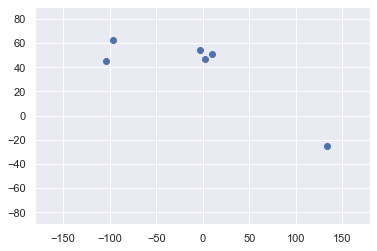

In [3]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Standardizing

Standardize unless you know one variable is much more important than the other

In [4]:
x = data.iloc[:,1:3]

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## K-means

In [5]:
# 3 clusters
kmeans = KMeans(3)

kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [6]:
identified_clusters = kmeans.fit_predict(x_scaled)
identified_clusters

array([1, 1, 2, 2, 2, 0], dtype=int32)

In [7]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


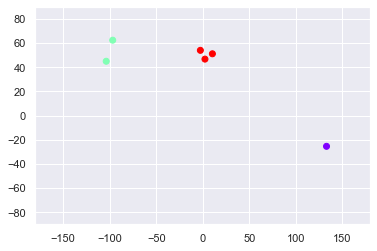

In [8]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Mapping categorial


In [9]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [13]:
x = data_mapped.iloc[:,3:4]
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [14]:
# 3 clusters
kmeans = KMeans(3)

kmeans.fit(x_scaled)

KMeans(n_clusters=3)

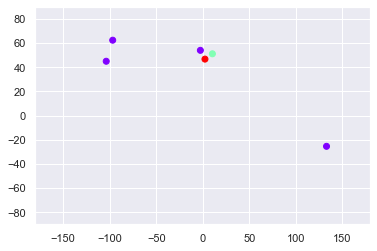

In [15]:
identified_clusters = kmeans.fit_predict(x_scaled)
identified_clusters

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Number of clusters

Elbow method: minimizing the distance between points in a cluster = maximizing the distance between clusters

WCSS: within-cluster sum of squares
* minimizing this means we reached the perfect clustering solution

Optimal: small number of clusters, low WCSS

Graph WCSS to number of clusters, optimal number is at the "elbow" (last point with significant decrease)

In [17]:
x = data.iloc[:,1:3]

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

x

wcss = []
for i in range(1, len(data_mapped)+1):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[12.000000000000002,
 2.306614239650664,
 0.22487761024739528,
 0.04469440405562376,
 0.016363388749074958,
 0.0]

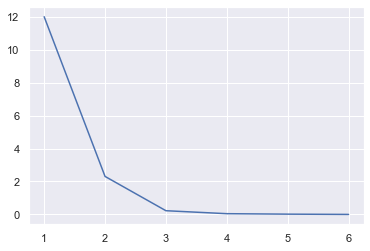

In [18]:
number_clusters = range(1, len(data_mapped)+1)
plt.plot(number_clusters, wcss)

3 clusters is optimal